In [22]:
import torch
import torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
%matplotlib inline
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [2]:
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE = 'cpu'
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_1x.yaml")
predictor = DefaultPredictor(cfg)

In [4]:
predictor = DefaultPredictor(cfg)

In [5]:
cap = cv2.VideoCapture('videos/SAL.mp4')
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
current_frame = 0
WIDTH = cap.get(3)
print(WIDTH)
HEIGHT = cap.get(4)
print(HEIGHT)
FPS = cap.get(5)
print(FPS)

_, frame = cap.read()

1920.0
1080.0
30.05157593123209


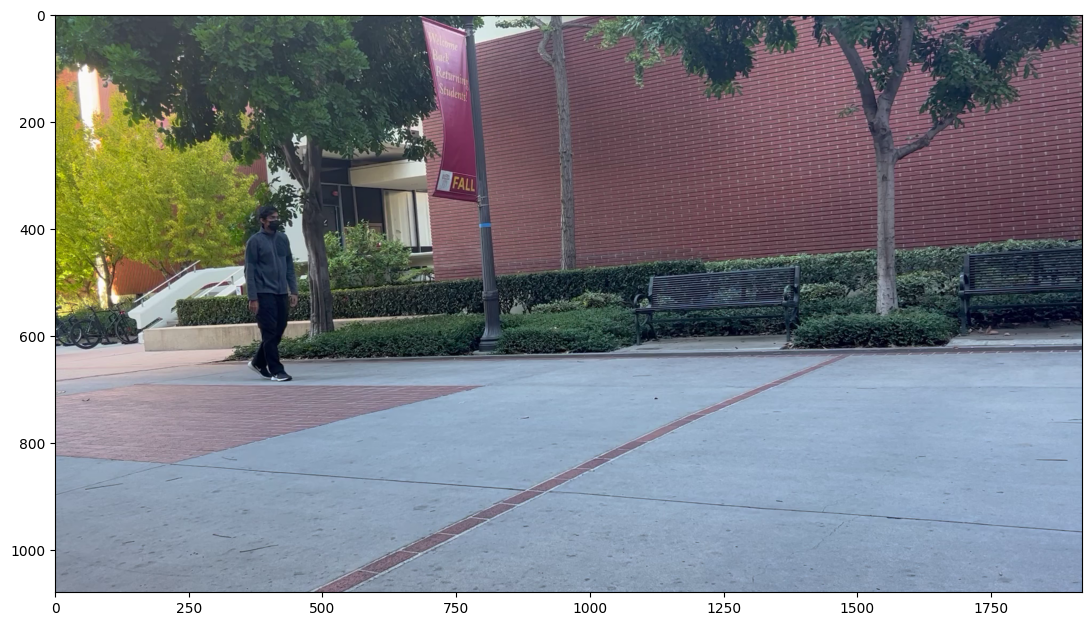

In [6]:
plt.figure(figsize=(15,7.5))
plt.imshow(frame[..., ::-1])

In [7]:
outputs = predictor(frame[..., ::-1])

/home/zhang/miniconda3/envs/csci576/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
print(outputs)

{'instances': Instances(num_instances=4, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[ 360.6440,  359.5878,  450.3046,  684.9166],
        [1075.8572,  466.8975, 1401.4948,  623.5115],
        [1690.0002,  426.7625, 1916.4841,  593.4463],
        [  25.0944,  551.0371,  123.2375,  624.5327]])), scores: tensor([0.9992, 0.9988, 0.9954, 0.5444]), pred_classes: tensor([ 0, 13, 13,  1]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [Fals

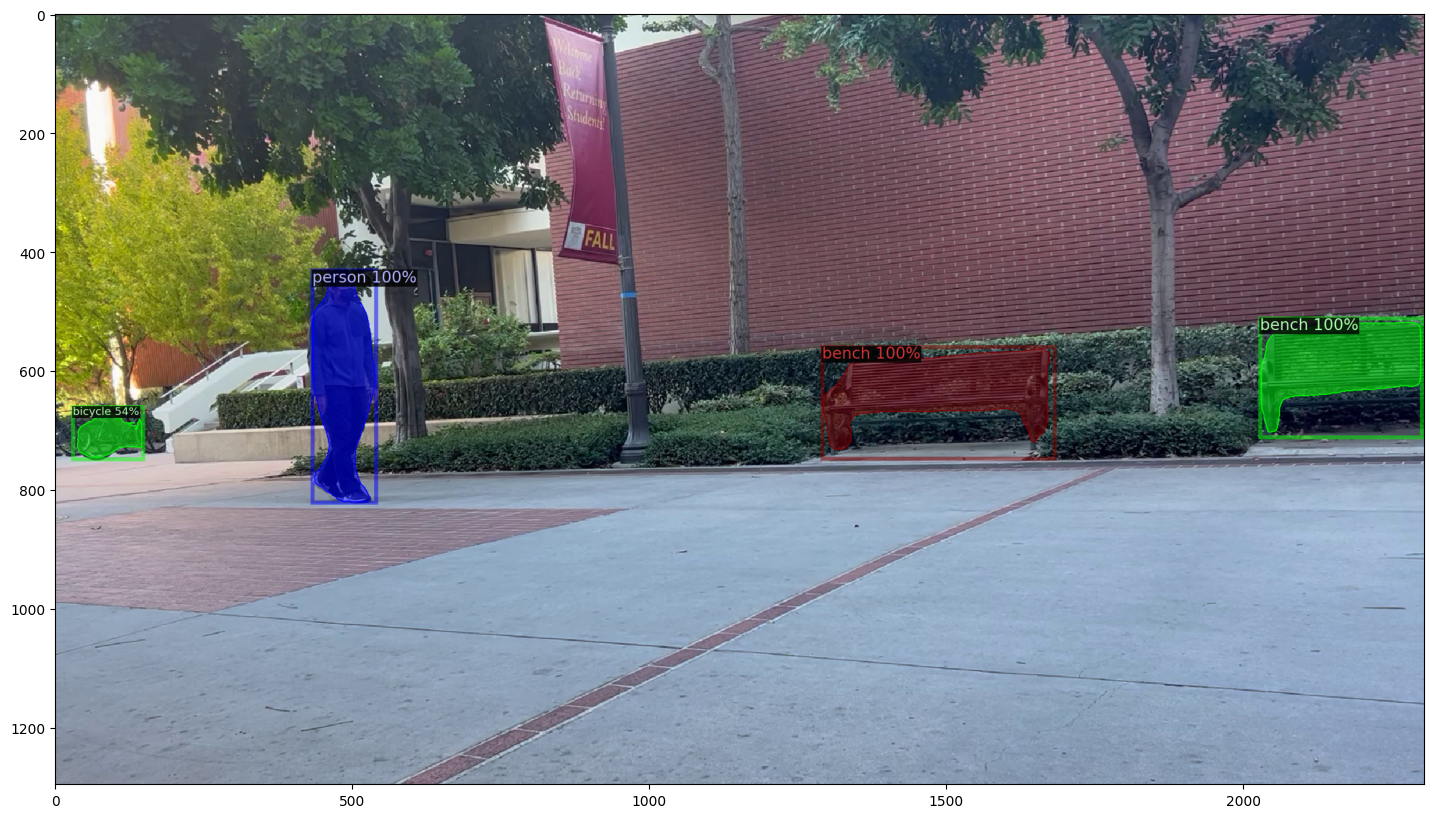

In [9]:
v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])

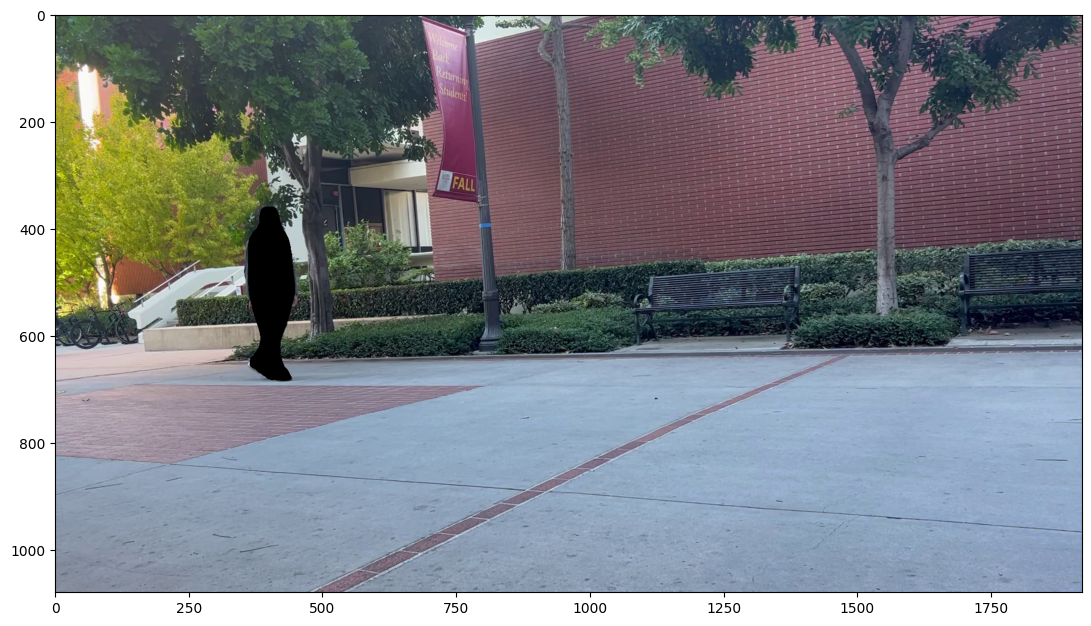

In [18]:
masked = frame.copy()
masked[outputs["instances"][outputs["instances"].pred_classes == 0].pred_masks[0] == True] = [0, 0, 0]
plt.figure(figsize=(15,7.5))
plt.imshow(masked[..., ::-1])

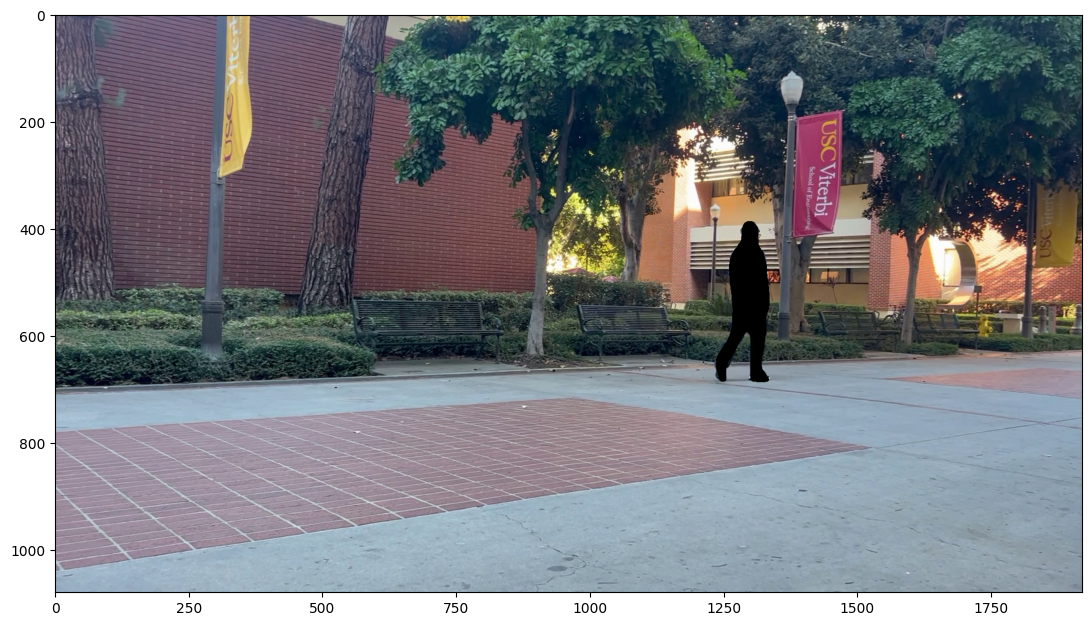

In [23]:
for i in range(200):
    _, frame2 = cap.read()
outputs = predictor(frame2[..., ::-1])
masked2 = frame2.copy()
masked2[outputs["instances"][outputs["instances"].pred_classes == 0].pred_masks[0] == True] = [0, 0, 0]
plt.figure(figsize=(15,7.5))
plt.imshow(masked2[..., ::-1])